In [1]:
import torch #create tensors to raw data and weights
import torch.nn as nn # make tensores part of nn
import torch.nn.functional as F #gives activation function  
from torch.optim import SGD #stochastic gradient descend

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class BasicNN(nn.Module):
    def __init__(self):#creates and inicializes weights and biases + all objects will have it
        super(BasicNN, self).__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        
    def forward(self, input):#Makes foward pass trought neural network to see what input will give out
        input_to_top_relu = (input*self.w00)+self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output*self.w01
        
        input_to_bottom_relu = (input*self.w10)+self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output*self.w11 

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        output = F.relu(input_to_final_relu)

        return output
        
        
        


In [3]:
input_doses = torch.linspace(start=0, end=1, steps=11)#create tendor with 11 values from 0 to 1
#Print(input_doses)

Text(0.5, 0, 'Dose')

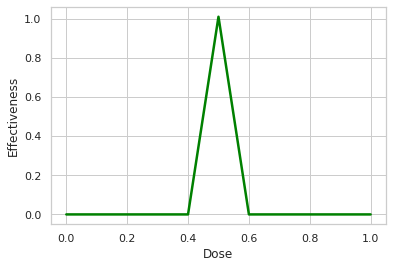

In [4]:
model = BasicNN()

output_values = model(input_doses)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses, y = output_values.detach(), color = 'green', linewidth=2.5)

plt.ylabel('Effectiveness')
plt.xlabel('Dose')